In [2]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("1982.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1982,17708,390,28,3529
1,1982,17087,287,38,3524
2,1982,17606,372,39,3511
3,1982,17572,228,16,3561
4,1982,17443,34,14,3508
...,...,...,...,...,...
1889,1982,17386,168,42,3509
1890,1982,17898,400,24,3532
1891,1982,17551,213,41,3543
1892,1982,17937,399,18,3552


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1894, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1894 non-null   int64
 1   Maximum length (m))  1894 non-null   int64
 2   Recession(m),        1894 non-null   int64
 3   Rate/yr(m)           1894 non-null   int64
 4   Snout altitude (m)   1894 non-null   int64
dtypes: int64(5)
memory usage: 74.1 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1894


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1982,17708,390,28,3529
1,1982,17087,287,38,3524
2,1982,17606,372,39,3511
3,1982,17572,228,16,3561
4,1982,17443,34,14,3508


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0036,0.0260,0.0190
"Recession(m),",NaN,-0.0036,1.0000,-0.0053,0.0119
Rate/yr(m),NaN,0.0260,-0.0053,1.0000,0.0329
Snout altitude (m),NaN,0.0190,0.0119,0.0329,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0260
Snout altitude (m)     0.0190
Recession(m),         -0.0036
Year                      NaN
Name: Maximum length (m)), dtype: float64

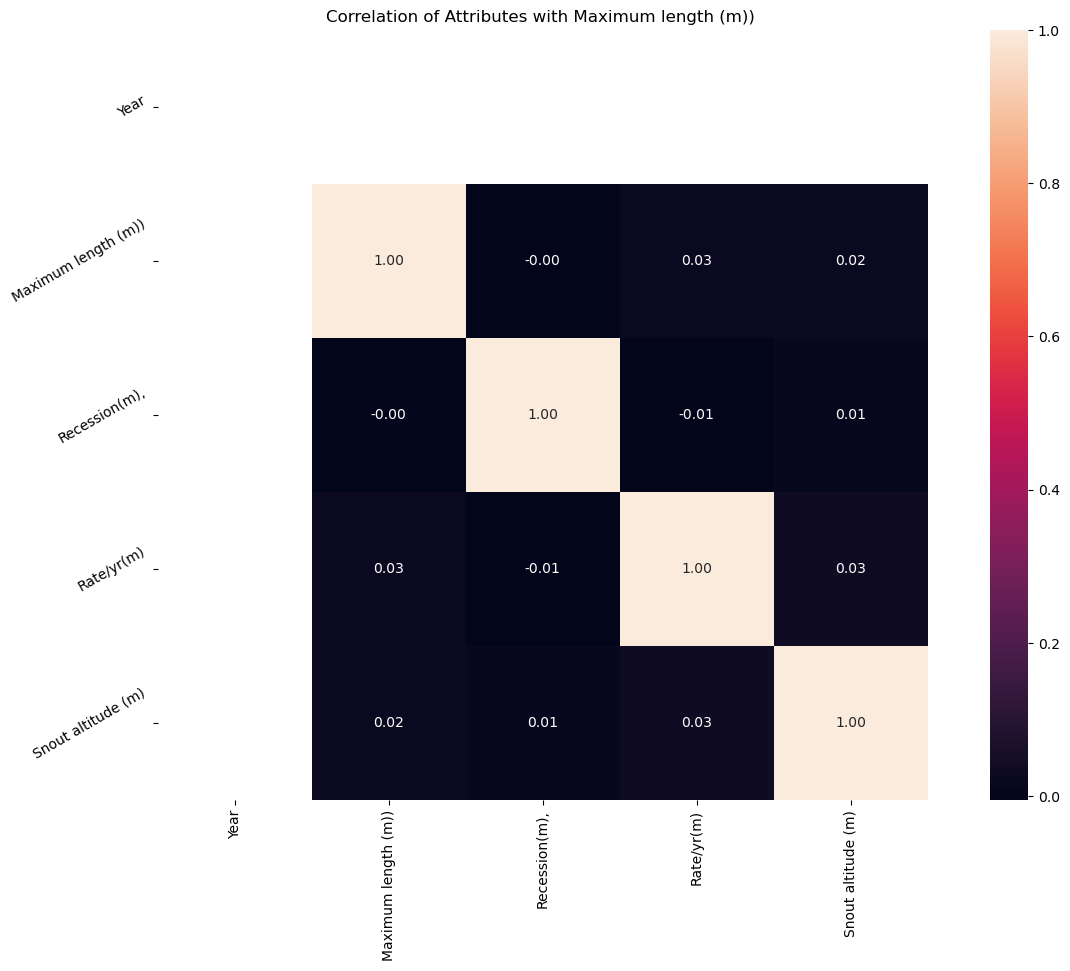

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,894.0000","1,894.0000","1,894.0000","1,894.0000","1,894.0000"
mean,"1,982.0000","17,554.3052",218.9799,27.3801,"3,531.9023"
std,0.0000,302.2869,126.6314,8.8025,20.4662
min,"1,982.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,982.0000","17,290.2500",111.2500,20.0000,"3,514.0000"
50%,"1,982.0000","17,552.0000",217.0000,27.0000,"3,532.0000"
75%,"1,982.0000","17,813.7500",324.0000,35.0000,"3,550.0000"
max,"1,982.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1982   1.0000
Name: count, dtype: float64

Recession(m),
302   0.0063
111   0.0053
186   0.0048
31    0.0048
257   0.0048
       ...  
127   0.0005
106   0.0005
74    0.0005
299   0.0005
166   0.0005
Name: count, Length: 432, dtype: float64

Rate/yr(m)
42   0.0449
24   0.0407
14   0.0385
21   0.0380
15   0.0370
17   0.0364
38   0.0359
39   0.0359
27   0.0354
23   0.0348
16   0.0348
18   0.0343
29   0.0338
28   0.0338
31   0.0333
34   0.0333
25   0.0327
13   0.0322
41   0.0317
33   0.0317
22   0.0312
26   0.0312
36   0.0301
37   0.0296
40   0.0296
32   0.0296
19   0.0290
20   0.0269
35   0.0269
30   0.0269
Name: count, dtype: float64

Snout altitude (m)
3503   0.0206
3535   0.0201
3558   0.0185
3559   0.0180
3515   0.0180
        ...  
3548   0.0100
3532   0.0100
3549   0.0100
3500   0.0084
3496   0.0005
Name: count, Length: 72, dtype: float64



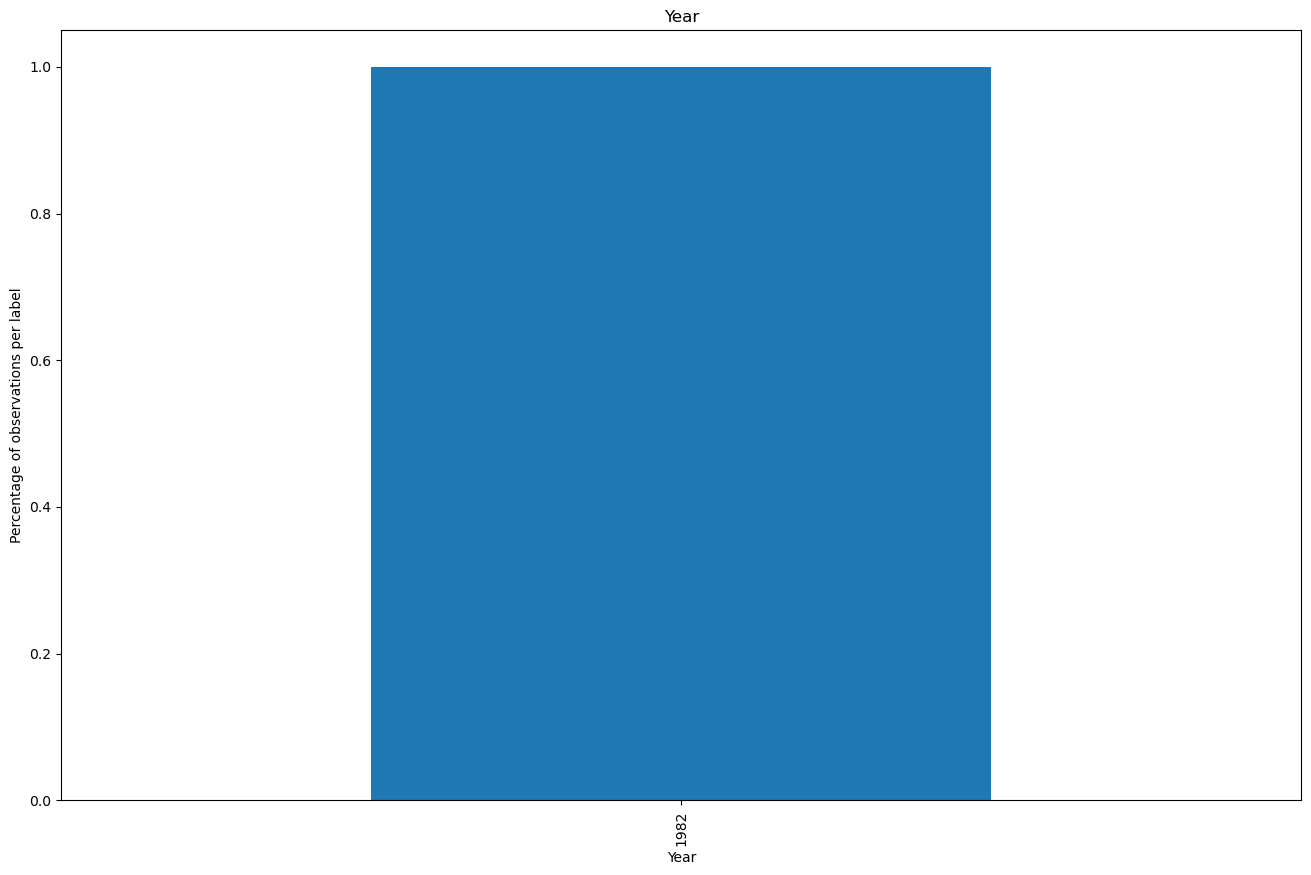

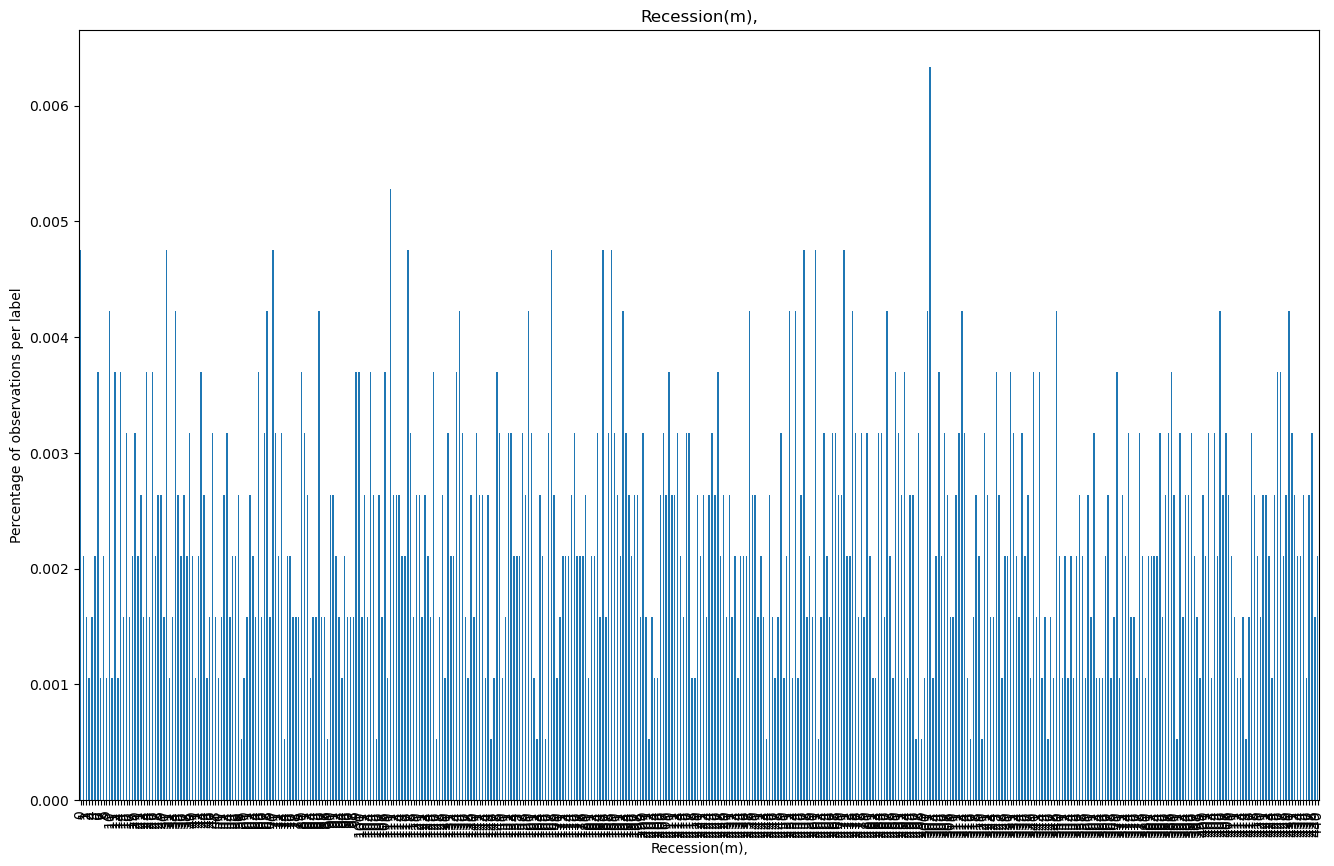

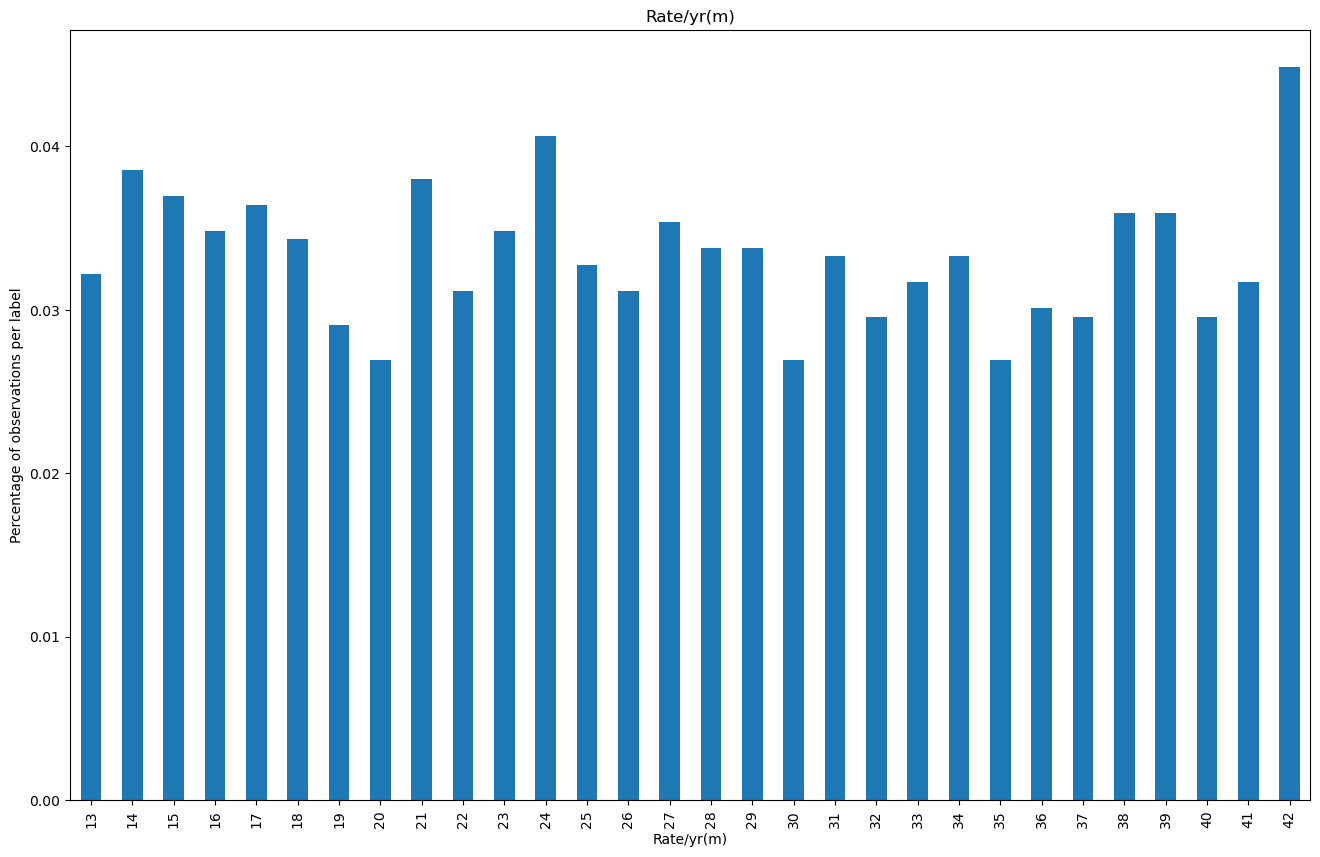

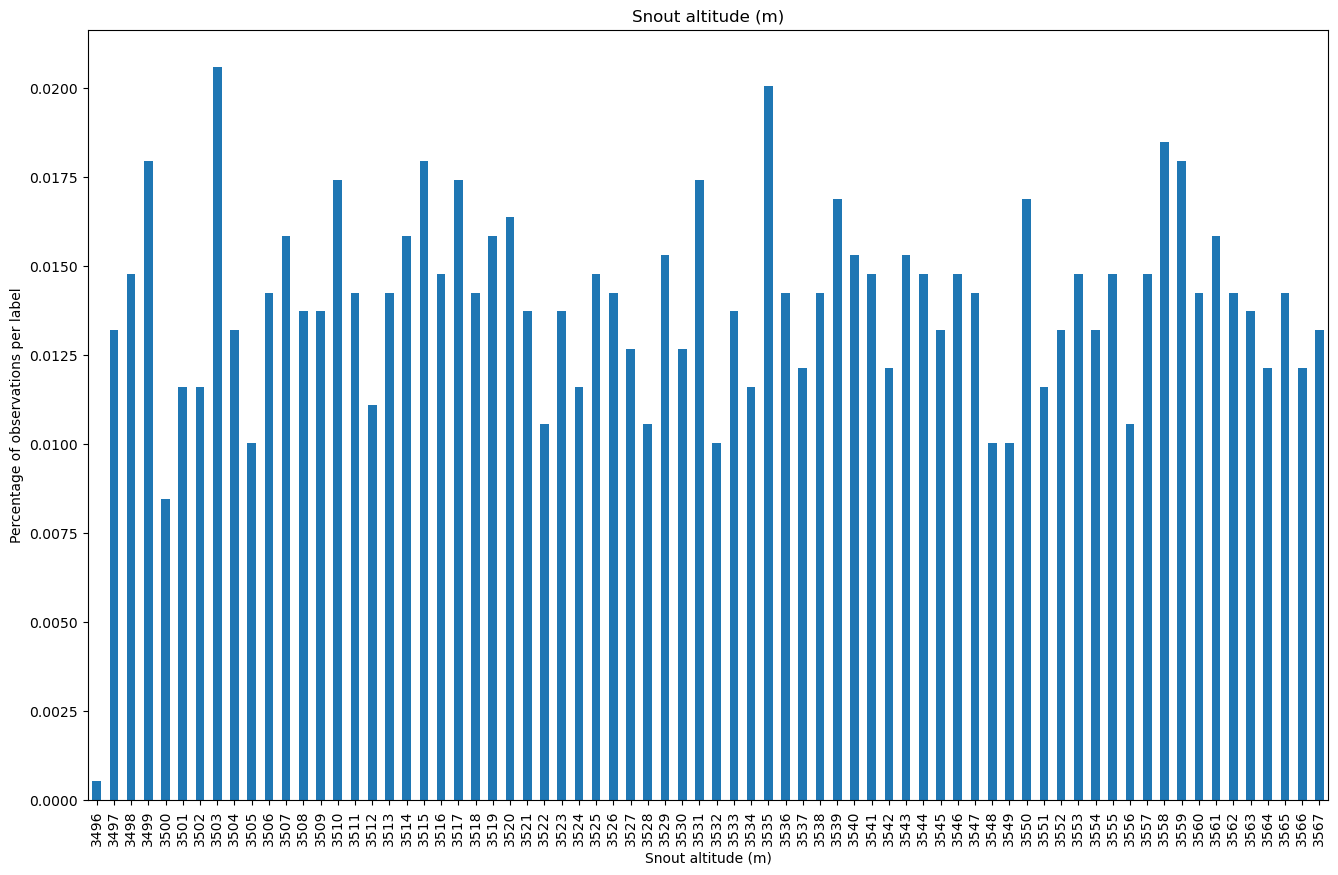

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()